c:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


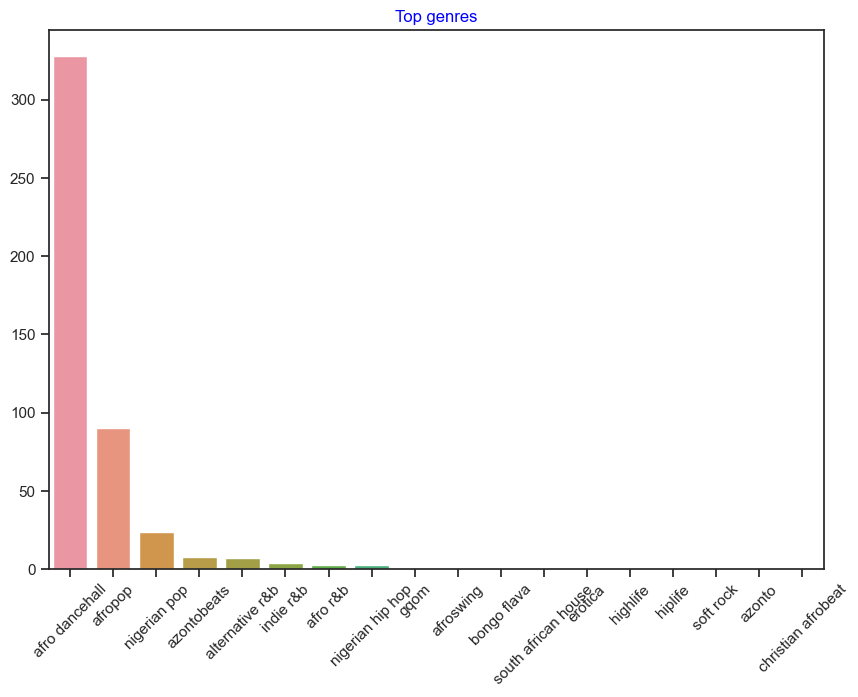

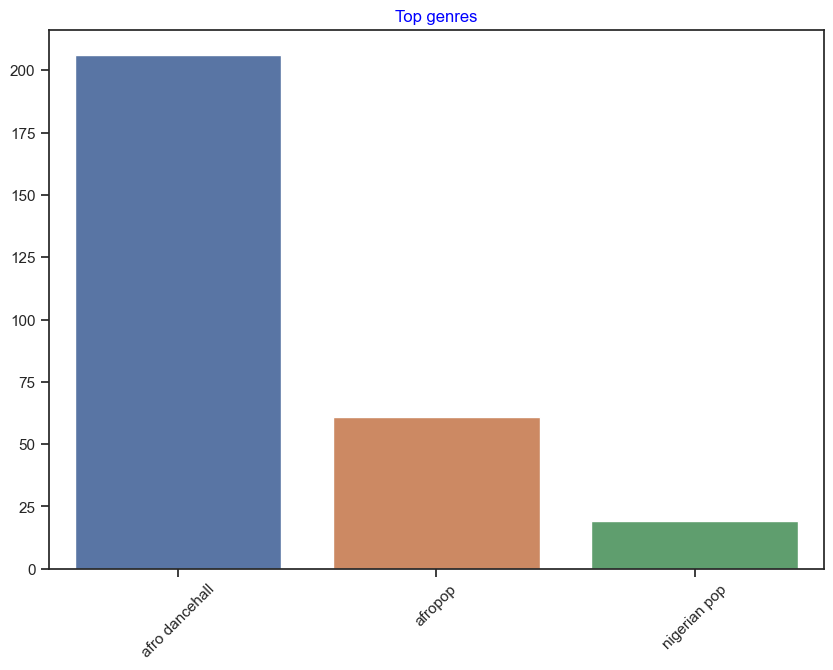

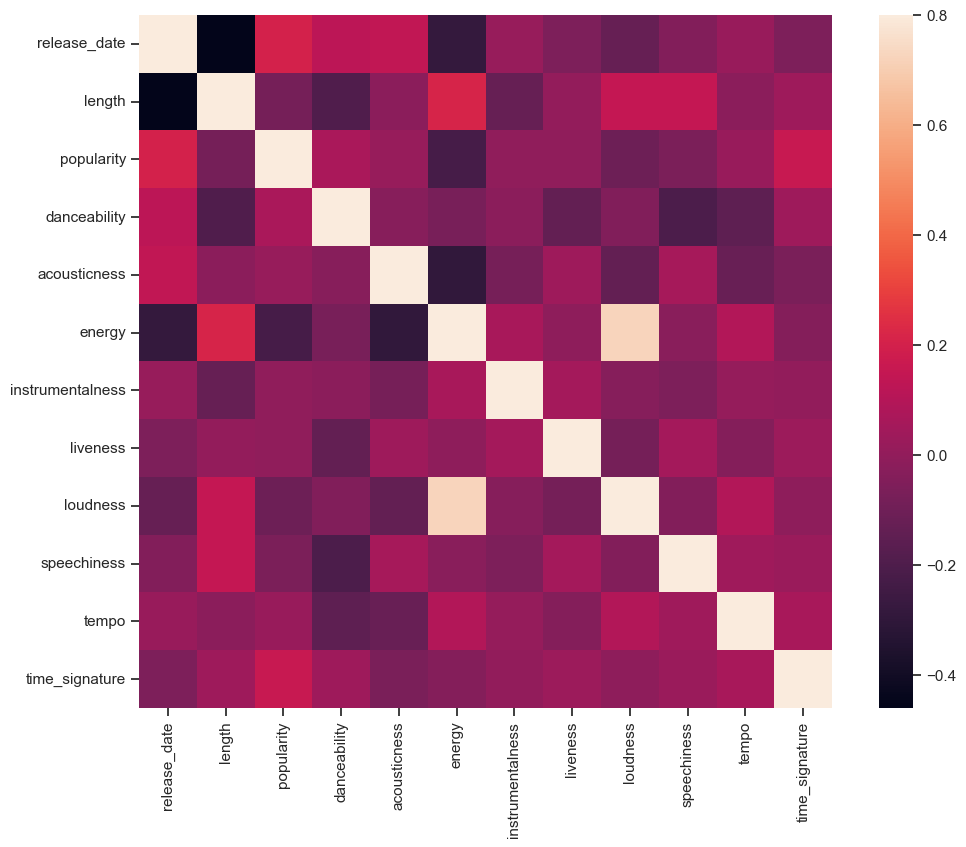

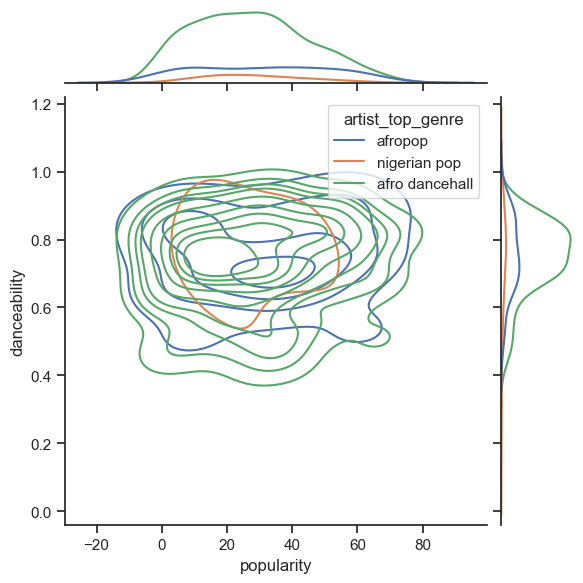

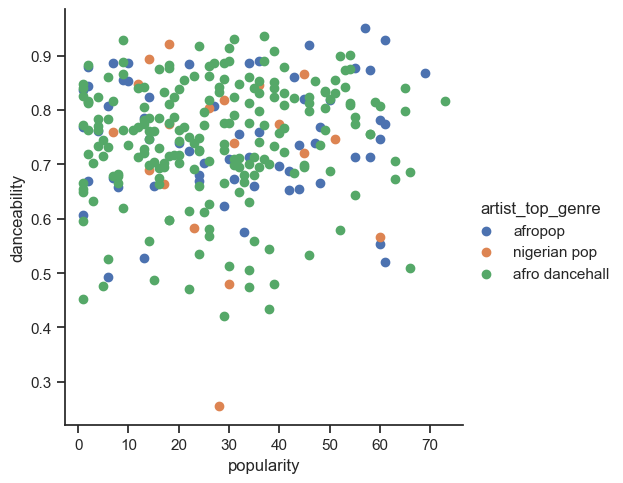

In [3]:

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:\\Users\\HP\\Desktop\\-ArewaDS-Machine-Learning-Assignments--1\\Data\\nigerian-songs.csv")
#df.tail()

#Get some information about the dataframe, calling info():
#df.info()

#Double-check for null values, by calling isnull() and verifying the sum being 0:
#df.isnull().sum()

#Describe the data:
df.describe()

# If we are working with clustering, an unsupervised method that does not require labeled data, why are we showing this data with labels? 
# In the data exploration phase, they come in handy, but they are not necessary for the clustering algorithms to work. You could just as 
# well remove the column headers and refer to the data by column number. Look at the general values of the data. Note that popularity can 
# be '0', which show songs that have no ranking. Let's remove those shortly.

#Use a barplot to find out the most popular genres:
import seaborn as sns

#top = df['artist_top_genre'].value_counts()
#plt.figure(figsize=(10,7))
#sns.barplot(x=top[:5].index,y=top[:5].values)
#plt.xticks(rotation=45)
#plt.title('Top genres',color = 'blue')

# If you'd like to see more top values, change the top [:5] to a bigger value, or remove it to see all. Note, when the top genre is described
# as 'Missing', that means that Spotify did not classify it, so let's get rid of it. 

# Get rid of missing data by filtering it out:

df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

#By far, the top three genres dominate this dataset. Let's concentrate on afro dancehall, afropop, and nigerian pop, additionally filter the 
# dataset to remove anything with a 0 popularity value (meaning it was not classified with a popularity in the dataset and can be considered 
# noise for our purposes):

df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres', color = 'blue')

#Do a quick test to see if the data correlates in any particularly strong way:

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#The only strong correlation is between energy and loudness, which is not too surprising, given that loud music is usually pretty energetic. 
#Otherwise, the correlations are relatively weak. It will be interesting to see what a clustering algorithm can make of this data.
#Note that correlation does not imply causation! We have proof of correlation but no proof of causation. An amusing web site has some visuals
# that emphasize this point.

#Is there any convergence in this dataset around a song's perceived popularity and danceability? A FacetGrid shows that there are concentric 
# circles that line up,regardless of genre. Could it be that Nigerian tastes converge at a certain level of danceability for this genre?

#ry different datapoints (energy, loudness, speechiness) and more or different musical genres. What can you discover? Take a look at the
#df.describe() table to see the general spread of the data points.

#DATA DISTRIBUTION
# Are these three genres significantly different in the perception of their danceability, based on their popularity?
# Examine our top three genres data distribution for popularity and danceability along a given x and y axis.

sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

#You can discover concentric circles around a general point of convergence, showing the distribution of points.
#Note that this example uses a KDE (Kernel Density Estimate) graph that represents the data using a continuous probability density curve. 
# This allows us to interpret data when working with multiple distributions. In general, the three genres align loosely in terms of their 
# popularity and danceability. Determining clusters in this loosely-aligned data will be a challenge:

sns.FacetGrid(df, hue="artist_top_genre", size=5) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()
   
#In general, for clustering, you can use scatterplots to show clusters of data, so mastering this type of visualization is very useful.
# In the next lesson, we will take this filtered data and use k-means clustering to discover groups in this data that see to overlap in 
# interesting ways.